In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [3]:
# Exploratory Data Analysis

In [4]:
deaths_clean = pd.read_csv('./deaths.csv')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Deaths From Influenza'),
 Text(0.5, 1.0, 'Deaths due to Influenza by Year')]

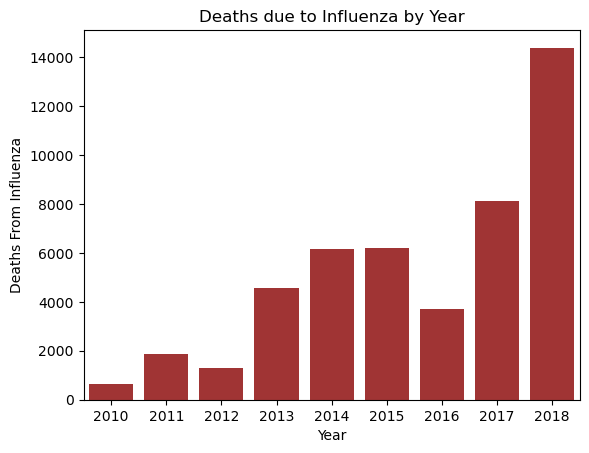

In [5]:
# Are there any discernable trends across the decade for death from pneumonia and influenza?

decades_natl = deaths_clean[(deaths_clean['geo_level']  == 'National') & (deaths_clean['age'] == 'All')].groupby('year').sum(numeric_only = True).reset_index()

dcd_flu_plt = sns.barplot(decades_natl, x = 'year', y = 'flu_deaths', color = 'firebrick')
dcd_flu_plt.set(xlabel = "Year", ylabel = "Deaths From Influenza", title = "Deaths due to Influenza by Year")

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Deaths From Pneumonia'),
 Text(0.5, 1.0, 'Deaths due to Pneumonia by Year')]

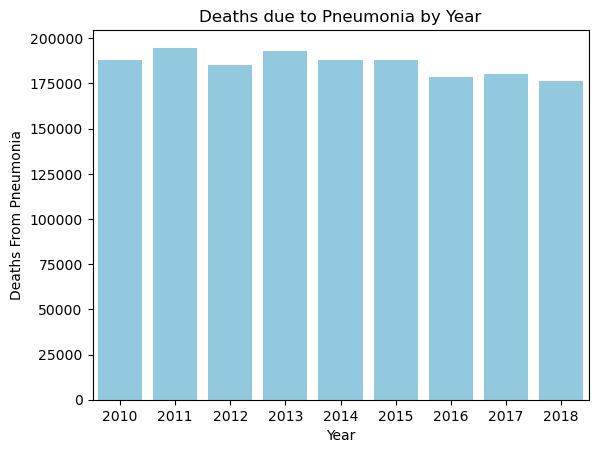

In [6]:
dcd_pneu_plt = sns.barplot(decades_natl, x = 'year', y = 'pneu_deaths', color = 'skyblue')
dcd_pneu_plt.set(xlabel = "Year", ylabel = "Deaths From Pneumonia", title = "Deaths due to Pneumonia by Year")

In [9]:
# How do these trends compare across region?

decades_region = deaths_clean[(deaths_clean['geo_level']  == 'Region')].groupby(['region', 'year']).sum(numeric_only=True)

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Deaths From Influenza'),
 Text(0.5, 1.0, 'Deaths due to Influenza by Year and Region')]

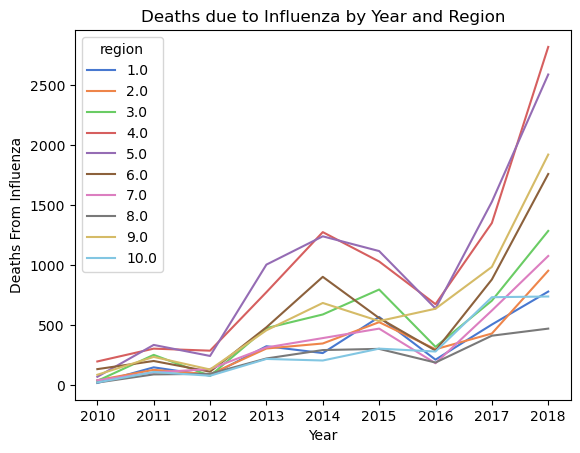

In [16]:
region_flu_plt = sns.lineplot(decades_region, x = 'year', y = 'flu_deaths', hue = 'region', palette = 'muted')
region_flu_plt.set(xlabel="Year", ylabel="Deaths From Influenza", title = "Deaths due to Influenza by Year and Region")

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Deaths From Pneumonia'),
 Text(0.5, 1.0, 'Deaths due to Pneumonia by Year and Region')]

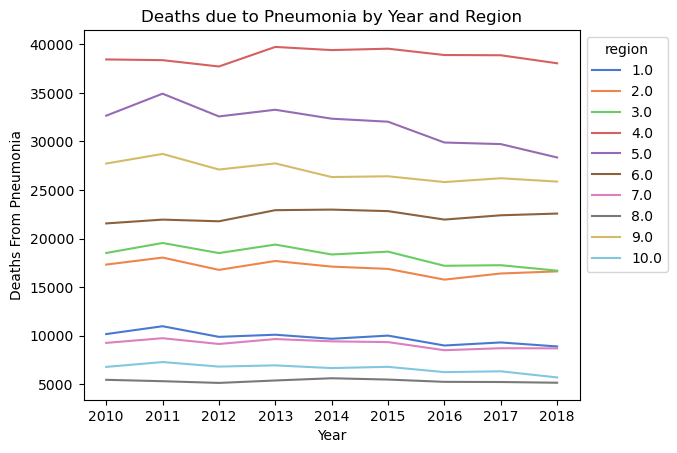

In [21]:
region_pneu_plt = sns.lineplot(decades_region, x = 'year', y = 'pneu_deaths', hue = 'region', palette = 'muted')
sns.move_legend(region_pneu_plt, 'upper left', bbox_to_anchor=(1,1))
region_pneu_plt.set(xlabel='Year', ylabel = 'Deaths From Pneumonia', title = "Deaths due to Pneumonia by Year and Region")

In [18]:
# For a specific state, say Utah, how do the percentage of deaths change by week of the year?

utah_deaths = deaths_clean[deaths_clean['state'] == 'Utah']
pct_flu_pneu = utah_deaths['pneu_flu_deaths'] / utah_deaths['all_deaths']
utah_deaths_pct = pd.concat([utah_deaths, pct_flu_pneu], axis = 1)
utah_deaths_pct.columns = utah_deaths.columns.to_list() + ['pct_flu_pneu']

[Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'Percent of Deaths'),
 Text(0.5, 1.0, 'Percent of Deaths Due to Pneumonia and Influenza by Week of the Year')]

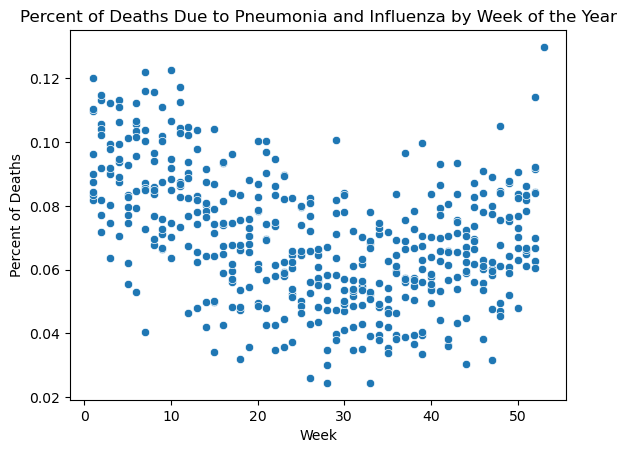

In [20]:
utah_plt = sns.scatterplot(utah_deaths_pct, x = 'week', y = 'pct_flu_pneu')
utah_plt.set(xlabel = "Week", ylabel = "Percent of Deaths", title = "Percent of Deaths Due to Pneumonia and Influenza by Week of the Year")

[Text(0.5, 0, 'Week of the Year'),
 Text(0, 0.5, 'Total Deaths'),
 Text(0.5, 1.0, 'Deaths due to Pneumonia and Influenza \n in the United States by Week and Year')]

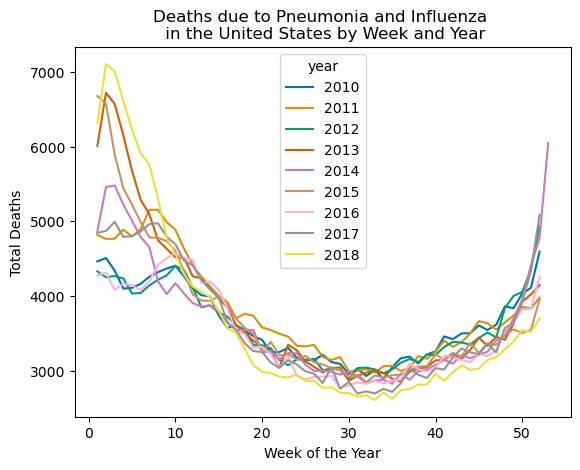

In [11]:
# How deaths from pneumonia and influenza compare across the seasons? 

total_deaths = deaths_clean[(deaths_clean['geo_level'] == 'State')].groupby(['week', 'year']).sum(numeric_only = True).reset_index()
pneu_flu_deaths = sns.lineplot(x = total_deaths['week'], y = total_deaths['pneu_flu_deaths'], hue = total_deaths['year'], palette = 'colorblind')
pneu_flu_deaths.set(xlabel = "Week of the Year", ylabel = "Number of Deaths", title = "Deaths due to Pneumonia and Influenza \n in the United States by Week and Year")